Import all the necessary libraries as:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import random

Given below is the code for the implementation of the K-Means Algorithm. We assume the parameters to the model are in the form of panda tables.

In [3]:
class KMC: #this is specific to the given 'Iris Dataset.csv' file.

    def __init__(self,k=3,iter=100):
        self.k = k #Number of clusters
        self.iter = iter

    def train(self,X): #Assume X is in the form of a panda table.
        self.num_inst, self.num_col = X.shape
        
        X = np.array(X)
        random.seed(18)
        centroids = []
        centroids.append(random.choice(X[:50]))
        centroids.append(random.choice(X[51:100]))
        centroids.append(random.choice(X[100:150])) #centroids has a random instance chosen from each of the three categories. 
        #I went for the splitting of my dataset X for better efficiency and output.
        centroids = np.array(centroids)
        # labels = np.zeros(self.num_inst)
        # centroids_new = []
        for item in range(self.iter):
            self.clusters = [[] for _ in range(self.k)] #Contains the sorted values (their indexes) in the cluster.
            for idx,pt in enumerate(X):
                ct = np.argmin(np.sqrt(np.sum((pt-centroids)**2,axis=1)))
                self.clusters[ct].append(idx)
            prev_cents = centroids
            for i,val in enumerate(self.clusters):
                centroids[i] = np.mean(X[val],axis=0)
            delta = centroids-prev_cents #we keep track of the difference to check for convergence.
            if not delta.any():
                break
        return self.clusters
    
    def predict(self,clusters):
        y = np.zeros(self.num_inst)
        for idx,cluster in enumerate(clusters):
            for i in cluster:
                y[i]=idx
        return y #returns the predicted clusters for the given input data.

Now lets focus on building the data for training and testing the model.

In [4]:
df = df = pd.read_csv("Iris Dataset.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df = df.drop('Id',axis=1)

df.Species = df.Species.replace('Iris-setosa',0)
df.Species = df.Species.replace('Iris-versicolor',1)
df.Species = df.Species.replace('Iris-virginica',2)

Y = df.Species.values
X = df.drop('Species',axis=1)

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [6]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Lets apply our model on the above dataset and catch the results.

In [8]:
Model = KMC(k=3,iter=100)
clusters = Model.train(X)
output = Model.predict(clusters)

In [9]:
output

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 2., 1., 2., 1., 0., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1.,
       2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.])

Now for the sns plot one can select any two columns for visualisation. For this purpose I went for the columns of 'PetalLengthCm' and 'SepalLendthCm'.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

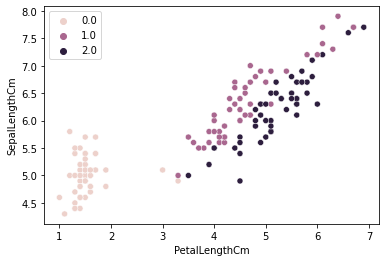

In [10]:
sns.scatterplot(data=df,x='PetalLengthCm',y='SepalLengthCm',hue=output)

Now lets compare the above graph with the true result. We have the true output stored in the variable Y.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

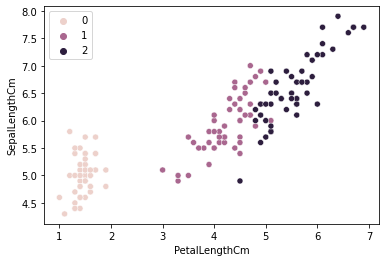

In [11]:
sns.scatterplot(data=df,x='PetalLengthCm',y='SepalLengthCm',hue=Y)

We see that the two graphs are near identical which shows that our model is moving in the right direction ;)

One might go for choosing another set of variables, this time say 'PetalWidthCm' and 'SepalWidthCm' for comparison.

<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

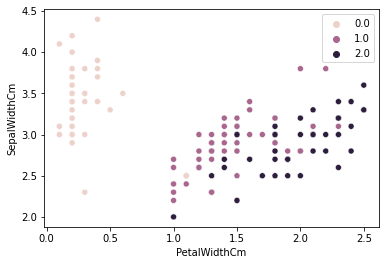

In [12]:
sns.scatterplot(data=df,x='PetalWidthCm',y='SepalWidthCm',hue=output)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

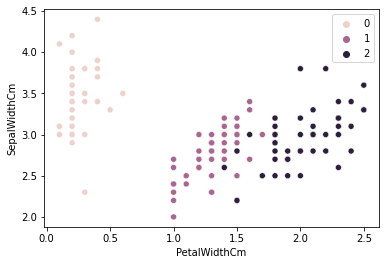

In [13]:
sns.scatterplot(data=df,x='PetalWidthCm',y='SepalWidthCm',hue=Y)

Now, lets shift our focus onto Primary Component Analysis. Basically, this is a method used to reduce the dimensions of the given dataset by looking at the variances of the different columns.

Given below is the code for the implementation of the PCA Algorithm. Say the input is in the form of a panda table.

In [14]:
class PCA:

    def __init__(self,p=2):
        self.p = p #p represents the number of eigenvalues we are looking to keep while reducing the dimension of the given data.

    def cov_arr(self,A,B):
        if len(A)==len(B):
            meanA = np.mean(A)
            meanB = np.mean(B)
            A = A - meanA
            B = B - meanB
            C = np.dot(A,B)
            C = C/len(A)
            return C
        else:
            print('Error - Length of the input variables are not same.')

    def cov_mat(self,X):
        C = np.zeros((self.num_feat,self.num_feat))
        for i in range(self.num_feat):
            for j in range(self.num_feat):
                C[i][j] = self.cov_arr(X[i],X[j])
        return C
    
    def eigen(self,A):
        C = []
        eigenval, eigenvec = np.linalg.eig(A)
        for i in range(self.num_feat):
            C.append((eigenval[i],eigenvec[i]))
        return C
        
    def apply(self,X): #Assume X parameter is given as a panda table.
        X = np.transpose(np.array(X))
        self.num_feat = X.shape[0]
        self.num_instances = X.shape[1]
        
        Cov = self.cov_mat(X)
        # Cov = np.cov(X)
        eig = self.eigen(Cov)
        eig.sort()
        eig = eig[:self.p] #We shall be taking only the first p eigenvalues into consideration.
        vec = []
        for e in eig:
            vec.append(e[1])
        vec = np.transpose(vec)
        out = np.dot(np.transpose(X),vec)
        return out


In [15]:
Obj = PCA(p=3) #We are attempting to reduce the dimension of the original dataset from 4 to 3.as_integer_ratio
X = Obj.apply(X)

Given below is the new value of X after the data was transformed into a new set of axis denoted by the different eigen values.

In [16]:
X

array([[ 3.01048606e+00,  4.98929356e+00, -2.20339819e+00],
       [ 2.90136404e+00,  4.73009543e+00, -1.82208822e+00],
       [ 2.78963045e+00,  4.58668209e+00, -2.01121873e+00],
       [ 2.85608760e+00,  4.49795295e+00, -1.81073698e+00],
       [ 2.98207231e+00,  4.92121309e+00, -2.26814253e+00],
       [ 3.46296421e+00,  5.24238558e+00, -2.40585725e+00],
       [ 2.89870550e+00,  4.49545887e+00, -2.12170194e+00],
       [ 3.02203711e+00,  4.89331201e+00, -2.06255825e+00],
       [ 2.71447143e+00,  4.28423264e+00, -1.70798254e+00],
       [ 2.88862872e+00,  4.80289648e+00, -1.80300821e+00],
       [ 3.18798662e+00,  5.28867108e+00, -2.31437952e+00],
       [ 3.00517441e+00,  4.72925000e+00, -1.98646266e+00],
       [ 2.79036759e+00,  4.69241012e+00, -1.78145190e+00],
       [ 2.44622735e+00,  4.24236685e+00, -1.91924288e+00],
       [ 3.18921786e+00,  5.66227292e+00, -2.74512621e+00],
       [ 3.49815844e+00,  5.57273609e+00, -2.91467772e+00],
       [ 3.24333984e+00,  5.21337595e+00

We can plot the entire data along the three columns shown above as:

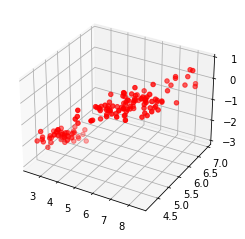

In [18]:
X = np.transpose(X)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X[0],X[1],X[2],c='r')
plt.show()

We see that all the data seems to fit into a single plane thus proving that the PCA aims at reducing the variance of the dataset completely in one direction which in this case seems to be the one perpendicular to the plane (almost) above.

Now, lets get the output of the data arrived after PCA Analysis and carry out in testing our KMC model.

In [19]:
X = np.transpose(X)
X.shape

(150, 3)

In [21]:
Model2 = KMC(k=3,iter=100)
clusters2 = Model.train(X)
output2 = Model.predict(clusters2)

In [22]:
output2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 2., 1., 2., 1., 0., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1.,
       2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 0., 1., 2., 2.,
       1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1.,
       2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.])

Now lets attempt at visualising this output by considering any two columns of X, say X[0] and X[1].

In [23]:
X = np.transpose(X)
X.shape

(3, 150)

<AxesSubplot:>

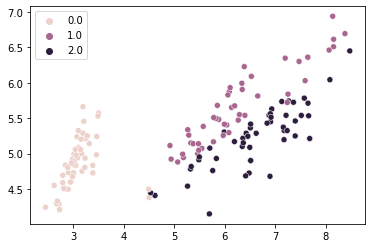

In [24]:
sns.scatterplot(x=X[0],y=X[1],hue=output2)

Lets compare this with the true value vector output denoted by Y.

<AxesSubplot:>

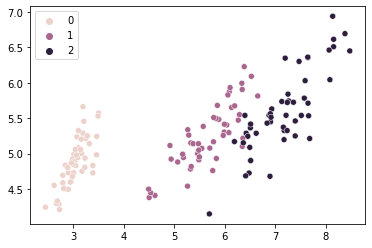

In [25]:
sns.scatterplot(x=X[0],y=X[1],hue=Y)

We can say that we did good as the above two graphs look pretty close ;)